Vamos a intentar hacer un poco de ML con los datos disponibles que tenemos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Bases de datos utilizadas/full_game_data.csv')

In [3]:
df

,Unnamed: 0,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,0,3326086514,1504279457970,1949,9,1,2,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,1,3229566029,1497848803862,1851,9,1,1,1,1,0,...,2,0,0,0,0,11,67,238,51,420
2,2,3327363504,1504360103310,1493,9,1,2,1,1,1,...,2,0,0,1,0,157,238,121,57,28
3,3,3326856598,1504348503996,1758,9,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,4,3330080762,1504554410899,2094,9,1,2,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,51485,3308904636,1503076540231,1944,9,2,1,2,2,0,...,10,2,0,4,0,55,-1,90,238,157
51486,51486,3215685759,1496957179355,3304,9,2,1,1,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,51487,3322765040,1504029863961,2156,9,2,2,2,2,0,...,10,2,0,2,0,113,122,53,11,157
51488,51488,3256675373,1499562036246,1475,9,2,2,2,2,0,...,11,3,0,1,0,154,39,51,90,114


In [4]:
df.shape

(51490, 62)

In [5]:
df.columns

Index(['Unnamed: 0', 'gameId', 'creationTime', 'gameDuration', 'seasonId',
       'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
    

In [6]:
try:
    df.drop(columns=['Unnamed: 0','gameId','creationTime','seasonId','t1_champ1id','t1_champ1_sum1','t1_champ1_sum2',
                    't1_champ2id','t1_champ2_sum1','t1_champ2_sum2','t1_champ3id','t1_champ3_sum1','t1_champ3_sum2','t1_champ4id',
                    't1_champ4_sum1','t1_champ4_sum2','t1_champ5id','t1_champ5_sum1','t1_champ5_sum2','t1_ban1','t1_ban2','t1_ban3',
                    't1_ban4','t1_ban5','t2_champ1id','t2_champ1_sum1','t2_champ1_sum2','t2_champ2id','t2_champ2_sum1','t2_champ2_sum2',
                    't2_champ3id','t2_champ4_sum2','t2_champ5id','t2_champ5_sum1','t2_champ5_sum2','t2_ban1','t2_ban2','t2_ban3','t2_ban4',
                    't2_ban5','t2_champ3_sum1','t2_champ3_sum2','t2_champ4id','t2_champ4_sum1'], inplace=True, axis=1)
except KeyError:
    pass

In [7]:
df

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,2,1,2,2,0,2,0,2,0,0,0,0,10,2,0,4,0
51486,3304,2,1,1,2,2,2,2,5,4,0,2,0,11,7,4,4,1
51487,2156,2,2,2,2,0,1,0,0,0,0,1,0,10,2,0,2,0
51488,1475,2,2,2,2,0,2,0,0,0,0,0,0,11,3,0,1,0


In [8]:
df.corr()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
gameDuration,1.000000,0.024187,0.105022,0.216842,0.379996,0.487788,0.255563,0.011690,0.369478,0.301616,0.397987,0.409414,0.006769,0.396769,0.319451,0.429793,0.416995,0.007818
winner,0.024187,1.000000,0.174770,0.375697,0.536437,0.261888,0.310386,0.119813,-0.771541,-0.649405,-0.369472,-0.472483,-0.218066,0.785813,0.660452,0.399249,0.497206,0.226102
firstBlood,0.105022,0.174770,1.000000,0.263866,0.169761,0.077293,0.189092,0.084062,-0.128116,-0.098918,-0.030571,-0.082820,-0.081243,0.223657,0.151111,0.076395,0.161045,0.122195
firstTower,0.216842,0.375697,0.263866,1.000000,0.380326,0.165028,0.403552,0.185989,-0.316477,-0.240035,-0.056867,-0.201023,-0.188326,0.511296,0.347641,0.161308,0.364361,0.274713
firstInhibitor,0.379996,0.536437,0.169761,0.380326,1.000000,0.417848,0.352760,0.166521,-0.276349,-0.269425,-0.076762,-0.161124,-0.100527,0.755335,0.699832,0.400133,0.487373,0.211380
firstBaron,0.487788,0.261888,0.077293,0.165028,0.417848,1.000000,0.201065,0.120714,-0.003740,-0.026035,0.134069,0.082034,-0.009653,0.460115,0.385864,0.793114,0.393952,0.121126
firstDragon,0.255563,0.310386,0.189092,0.403552,0.352760,0.201065,1.000000,0.159429,-0.190550,-0.164399,-0.045496,-0.386488,-0.102283,0.427092,0.299977,0.195352,0.629794,0.205444
firstRiftHerald,0.011690,0.119813,0.084062,0.185989,0.166521,0.120714,0.159429,1.000000,-0.083813,-0.059551,0.008027,-0.058104,0.189081,0.188240,0.141677,0.101231,0.150173,0.866779
t1_towerKills,0.369478,-0.771541,-0.128116,-0.316477,-0.276349,-0.003740,-0.190550,-0.083813,1.000000,0.824471,0.490723,0.626743,0.283925,-0.549123,-0.469600,-0.158556,-0.313789,-0.224888
t1_inhibitorKills,0.301616,-0.649405,-0.098918,-0.240035,-0.269425,-0.026035,-0.164399,-0.059551,0.824471,1.000000,0.481606,0.538469,0.210728,-0.467867,-0.408924,-0.153026,-0.279089,-0.164355


<AxesSubplot:>

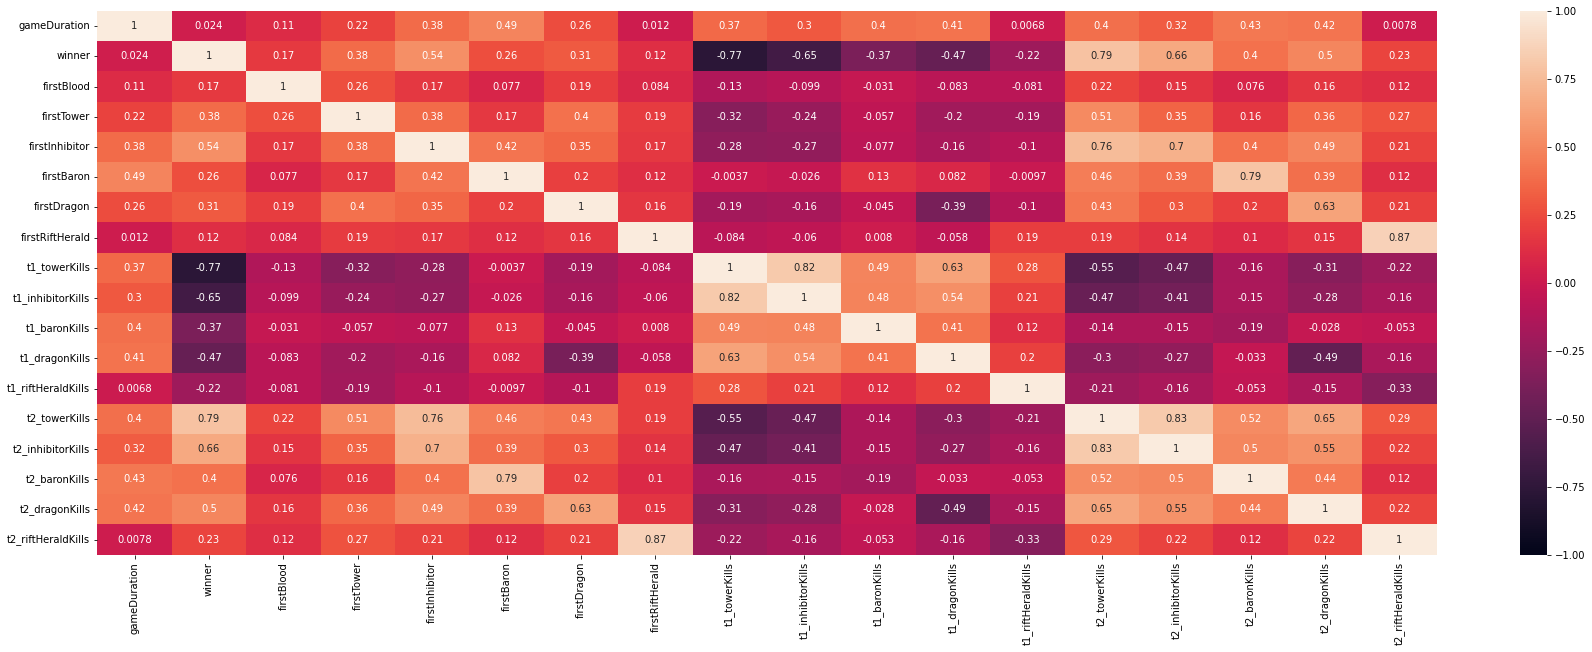

In [9]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

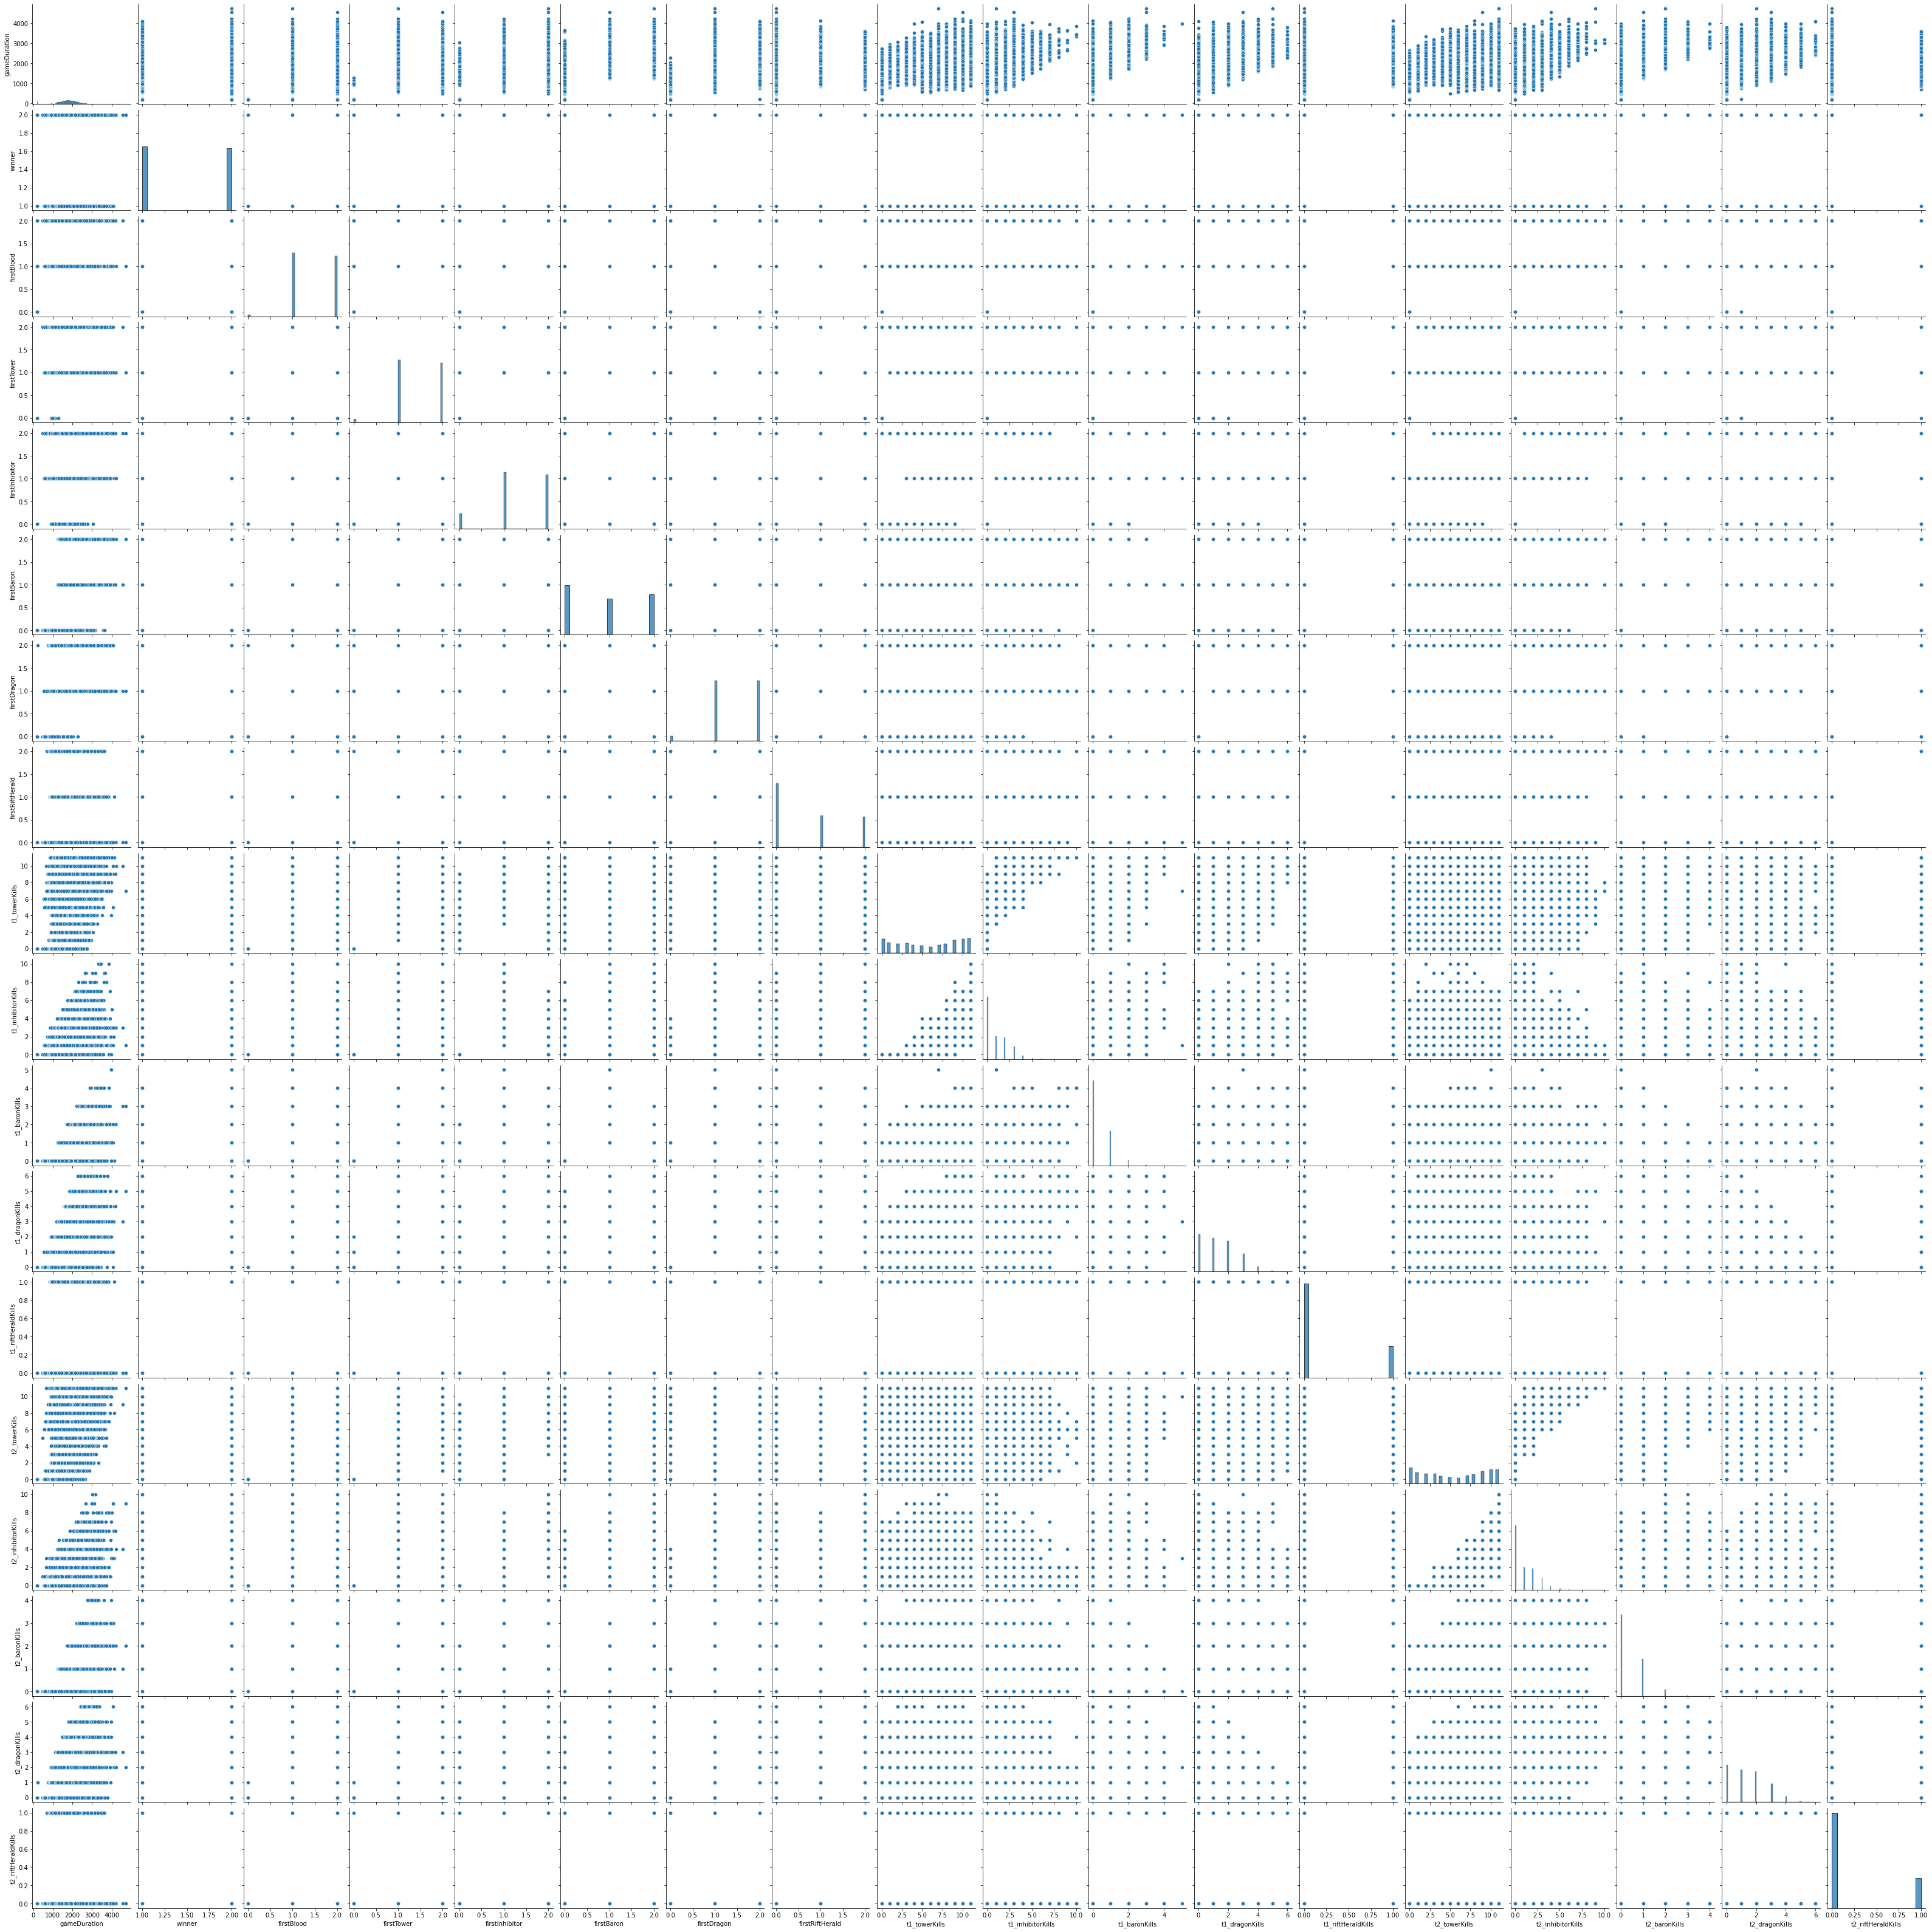

In [10]:
sns.pairplot(df)

In [11]:
X=df.loc[:,df.columns!='winner']
y = df['winner']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=True, train_size=.8)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
y_hat = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred=y_hat, y_true=y_test)
print(f'El score de accuracy es {accuracy}')

El score de accuracy es 0.9714507671392504


In [18]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model,X,y,cv=10,scoring='accuracy')


El cross validation score del modelo entrenado con RandomForests es [0.97319868 0.97164498 0.96814916 0.97416974 0.97009128 0.96912022
 0.96659546 0.97416974 0.97319868 0.97416974]


In [21]:
cv_score_mean = cv_score.mean()
print('La media del cross validation score del modelo entrenado con RandomForests es {:.3f}'.format(cv_score_mean))

La media del cross validation score del modelo entrenado con RandomForests es 0.971
